In [1]:
from IPython.display import SVG
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pdb


In [2]:

df = pd.read_csv('행정구역_시군구_별__성별_인구수_2011_2020', header=[0,1], index_col=0)
state_arr = np.unique([col for col in df.index if col !='전국'])
print(state_arr)

['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '인천광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']


In [3]:

people_dict = {}
for state in state_arr:
    people_201101 = df.loc[state]['2011. 01']['총인구수 (명)']
    people_202005 = df.loc[state]['2020. 05']['총인구수 (명)']
    if people_201101=='-':
        people_201101 = '1'
    if people_202005=='-':
        people_202005 = '1'
    diff_people = int(people_202005.replace(',','')) - int(people_201101.replace(',',''))
    people_dict[state]= [int(people_202005.replace(',','')), int(people_201101.replace(',','')), diff_people]


In [4]:

df = pd.DataFrame.from_dict(people_dict, orient='index', columns=['2011_01','2020_05','변화인구수'])


df['인구변화율'] = (df['2020_05'] - df['2011_01']) / df['2011_01'] * 100

limit = df['인구변화율'].quantile(0.94) # 94% 해당하는 값
df['인구변화율_정규'] = df['인구변화율'].apply(lambda x : limit if x > limit else x)



C:\Users\Von\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Von\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Von\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Von\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Von\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Von\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51064 missing from current font.

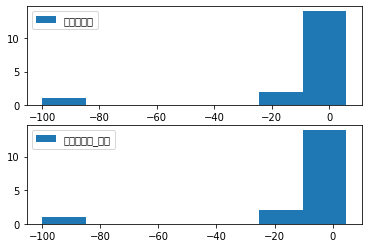

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(211) #2행 1열 1번
ax2 = fig.add_subplot(212) #2행 1열 2번
#bins = 도수분포구간(7개)
ax1.hist(df['인구변화율'], bins=7)
ax1.legend(['인구변화율'])
# bins = 도수분포구간(7개)
ax2.hist(df['인구변화율_정규'], bins=7)
ax2.legend(['인구변화율_정규'])
plt.show()

In [6]:
np.histogram(df['인구변화율'], bins=7) 

(array([ 1,  0,  0,  0,  0,  2, 14], dtype=int64),
 array([-99.99971046, -84.84974155, -69.69977264, -54.54980373,
        -39.39983482, -24.24986592,  -9.09989701,   6.0500719 ]))

In [7]:
np.histogram(df['인구변화율_정규'], bins=7) # Outlier를 조정 후 분포 형성

(array([ 1,  0,  0,  0,  0,  2, 14], dtype=int64),
 array([-99.99971046, -85.03694027, -70.07417008, -55.1113999 ,
        -40.14862971, -25.18585952, -10.22308933,   4.73968085]))

In [10]:
bin_labels = [ i for i in range(7) ]
pd.cut(x=df['인구변화율_정규'], bins=7, labels=bin_labels, include_lowest=True)

강원도        6
경기도        5
경상남도       6
경상북도       6
광주광역시      6
대구광역시      6
대전광역시      6
부산광역시      6
서울특별시      6
세종특별자치시    0
울산광역시      6
인천광역시      6
전라남도       6
전라북도       6
제주특별자치도    5
충청남도       6
충청북도       6
Name: 인구변화율_정규, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [13]:
bin_labels = [ i for i in range(7) ]
df['카테고리'] = pd.cut(x=df['인구변화율_정규'], bins=7, labels=bin_labels, include_lowest=True)
color_list = ['#F50057','#FF40AB','#E1BEE7','#CE93D8','#BA68C8','#9C27B0','#6A1B9A']

In [14]:
soup = Beautiful
for name, row in df.iterrows():
    p = soup.find('path', {'id': name } )
    c = color_list[ row['카테고리'] ]
    p['fill'] = c
SVG(soup.prettify())

NameError: name 'soup' is not defined